Probability of height between 162 cm and 190 cm: 0.9996
Expected value of uniform distribution [0,10]: 5.0
Expected time between pandemics (exponential, λ=1/50): 50.0
Estimated average drug dosage: 69610.48


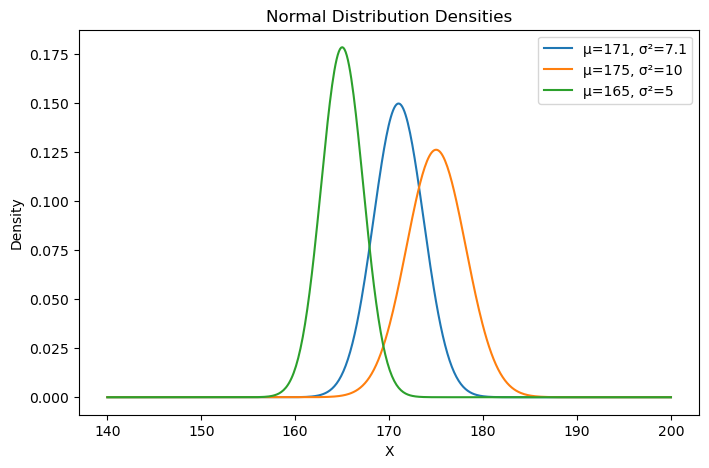

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def normal_density(mean, variance, x):
    sigma = np.sqrt(variance)
    return (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((x - mean)**2) / (2 * sigma**2))

# Plotting normal density function for different means and variances
def plot_normal_densities():
    x_values = np.linspace(140, 200, 500)
    params = [(171, 7.1), (175, 10), (165, 5)]
    
    plt.figure(figsize=(8, 5))
    for mean, var in params:
        y_values = [normal_density(mean, var, x) for x in x_values]
        plt.plot(x_values, y_values, label=f"μ={mean}, σ²={var}")
    
    plt.title("Normal Distribution Densities")
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Numerical integration to find probability
def integration(mean, variance, a, b):
    result, _ = quad(lambda x: normal_density(mean, variance, x), a, b)
    return result

# Probability of a male height between 162 cm and 190 cm
probability = integration(171, 7.1, 162, 190)
print(f"Probability of height between 162 cm and 190 cm: {probability:.4f}")

# Expected value for a uniform distribution
def expected_uniform(a, b):
    return (a + b) / 2

# Expected value for an exponential distribution
def expected_exponential(lambda_rate):
    return 1 / lambda_rate

# Computing expected values
expected_uniform_value = expected_uniform(0, 10)  # Example interval
expected_exponential_value = expected_exponential(1/50)  # λ = 1/50

print(f"Expected value of uniform distribution [0,10]: {expected_uniform_value}")
print(f"Expected time between pandemics (exponential, λ=1/50): {expected_exponential_value}")

# Estimating drug dosage
def drug_dosage(height):
    return 2.38 * height**2

dosage_expectation, _ = quad(lambda x: drug_dosage(x) * normal_density(171, 7.1, x), 140, 200)
print(f"Estimated average drug dosage: {dosage_expectation:.2f}")

# Plot the normal density functions
plot_normal_densities()
